Fancy Indexing
=====================

Basics
----------

In [1]:
import numpy as np
rand = np.random.RandomState(42)
x = rand.randint(100, size = 10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [2]:
[x[3], x[7], x[2]]

[71, 86, 14]

In [3]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

In [4]:
ind = np.array([[3, 7],
               [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [5]:
x = np.arange(12).reshape((3, 4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [6]:
# x[0, 2], x[1, 1], x[2, 3]

row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
x[row, col]

array([ 2,  5, 11])

In [8]:
# x[0, 2], x[0, 1], x[0, 3]
# x[1, 2], x[1, 1], x[1, 3]
# x[2, 2], x[2, 1], x[2, 3]

x[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [11]:
row[:, np.newaxis]

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

Combine indexing
--------------------------

In [12]:
x[2, [2, 0, 1]]

array([10,  8,  9])

In [13]:
x[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [14]:
mask = np.array([1, 0, 1, 0], dtype = bool)
x[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

Example) Selecting random dot
----------

General use of fancy indexing is to select column part of matrix

In [17]:
mean = [0, 0]
cov = [[1, 2],
      [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

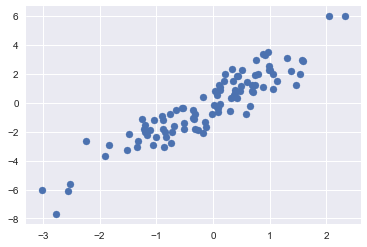

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:, 0], X[:, 1]);

By using fancy indexing, select random 20 dots

In [20]:
indices = np.random.choice(X.shape[0], 20, replace = False)
indices

array([22, 70, 33, 73, 75, 63, 13, 64, 41, 98, 25, 38, 55, 94, 78, 37, 61,
       20, 96, 69])

In [21]:
selection = X[indices]
selection.shape

(20, 2)

Now, mark which dots were selected

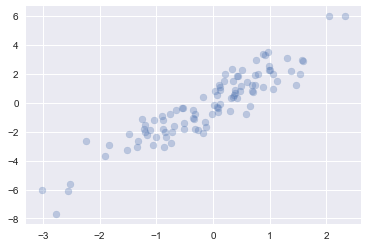

In [24]:
plt.scatter(X[:, 0], X[:, 1], alpha = 0.3)
plt.scatter(selection[:, 0], selection[:, 1],
           facecolor = 'none', s = 200);

Changing values by fancy indexing
----------------------------------------------------

In [15]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [16]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [25]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 1. 1. 0. 1. 0. 0. 0. 1. 0.]


Example) Data Segmentation
----------------

By using those methods, we can find where certain value belongs to which segmentation among 1000 values

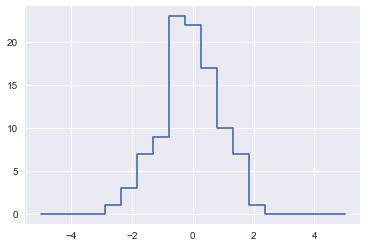

In [27]:
np.random.seed(42)
x = np.random.randn(100)
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

i = np.searchsorted(bins, x)

np.add.at(counts, i, 1)

plt.plot(bins, counts, linestyle = 'steps');

Sorting array
---------

In [28]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [30]:
x.sort()
print(x)

[1 2 3 4 5]


In [31]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


In [32]:
x[i]

array([1, 2, 3, 4, 5])

In [33]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [34]:
np.sort(X, axis = 0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [35]:
np.sort(X, axis = 1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

In [37]:
x = np.array([77, 32, 13, 12, 63, 85, 34])
np.partition(x, 4)

array([32, 12, 13, 34, 63, 77, 85])

In [38]:
np.partition(X, 2, axis = 1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

Example) K-neighbor Algorithm
-----

Find closest dots between two clusters

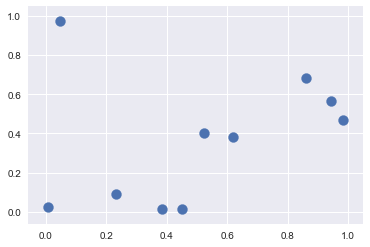

In [39]:
X = rand.rand(10, 2)

%matplotlib inline
plt.scatter(X[:, 0], X[:, 1], s = 100)

In [40]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis = -1)

differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [41]:
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [42]:
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [43]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [44]:
nearest = np.argsort(dist_sq, axis = 1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


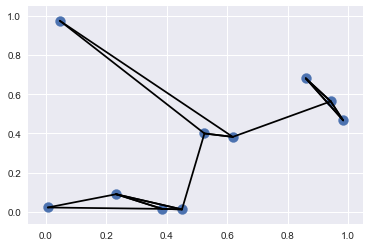

In [45]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis = 1)

plt.scatter(X[:, 0], X[:, 1], s = 100)

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K + 1]:
        plt.plot(*zip(X[j], X[i]), color = 'black')